# Importing The required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sns
import os
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Importing The data set form The os

In [2]:
os.getcwd()
os.chdir('C:\\Users\\Lenovo\\Desktop\\job thon')
df_train=pd.read_csv('train_F3fUq2S.csv')
df_test=pd.read_csv('test_Bk2wfZ3.csv')

In [3]:
df_train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [4]:
df_test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


# EDA and Data preprocessing

In [5]:
df_train.shape,df_test.shape

((1888, 22), (762, 21))

In [6]:
#data discription
df_train.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [7]:
#checkig of null value with in data set
df_train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [8]:
df_test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

In [9]:
#finding of numerical columns in the dataset
column=df_train.columns
nume=[feature for feature in column if df_train[feature].dtype != 'O']
print(len(nume))

21


In [10]:
#finding of numerical columns in the test dataset
columntest=df_test.columns
numetest=[feature for feature in columntest if df_test[feature].dtype != 'O']
print(len(numetest))

20


In [11]:
#finding chatagorical column in the train dataset and test dataset
cate=[feature for feature in column if df_train[feature].dtype == 'O']
print('Number of columns contain categorical data in train dataset',len(cate))
catetest=[feature for feature in columntest if df_test[feature].dtype == 'O']
print('Number of columns contain categorical data in test datset',len(catetest))

Number of columns contain categorical data in train dataset 1
Number of columns contain categorical data in test datset 1


<AxesSubplot:title={'center':'click_rate'}, ylabel='Frequency'>

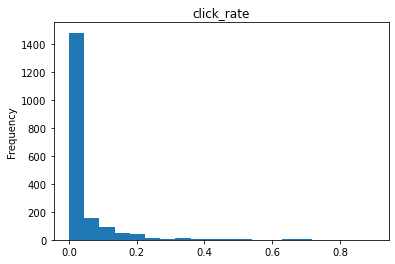

In [12]:
#checking wither it is a normal distribution or some other
df_train['click_rate'].plot.hist(bins=20,title='click_rate')

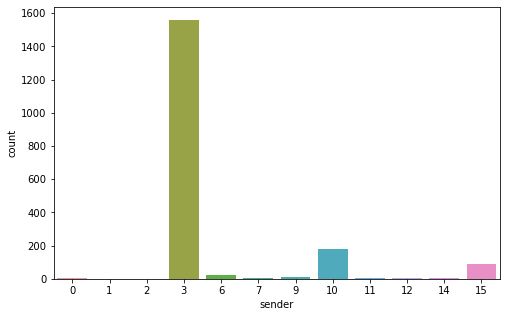

In [13]:
#sender columns analysis
mpl.figure(figsize=(8,5))
sns.countplot('sender',data=df_train)
mpl.show()

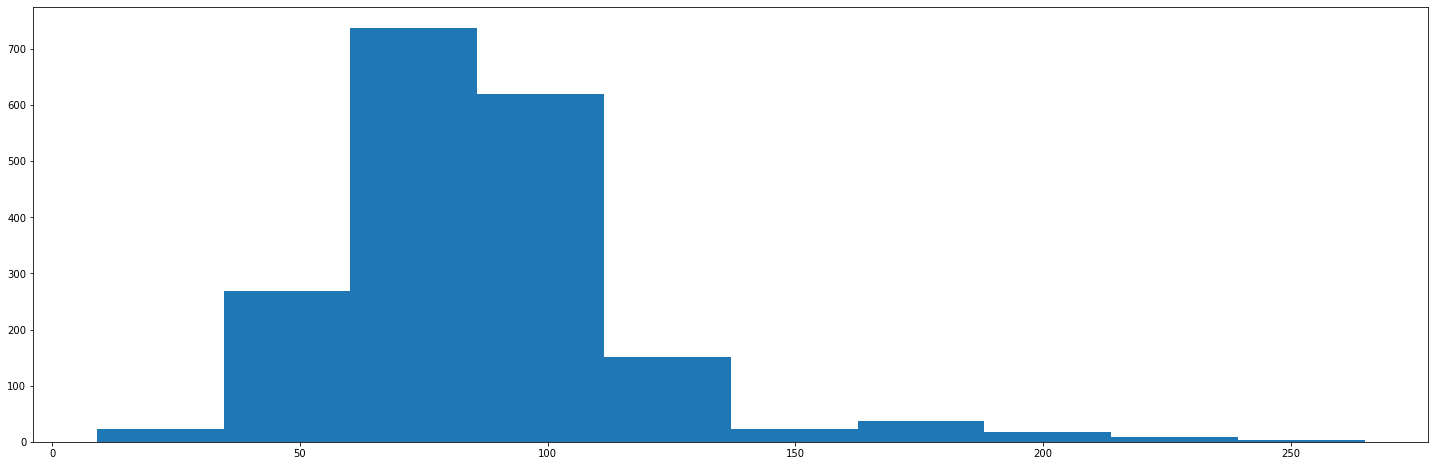

In [14]:
#subject length column analysis by using graph
mpl.figure(figsize=(25,8))
mpl.hist('subject_len',data=df_train)
mpl.show()

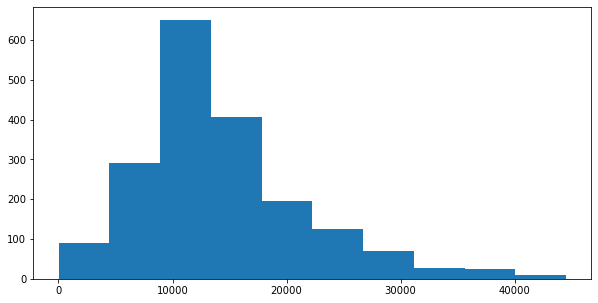

In [15]:
#body length columns analysis it contain normal distribution
mpl.figure(figsize=(10,5))
mpl.hist('body_len',data=df_train)
mpl.show()

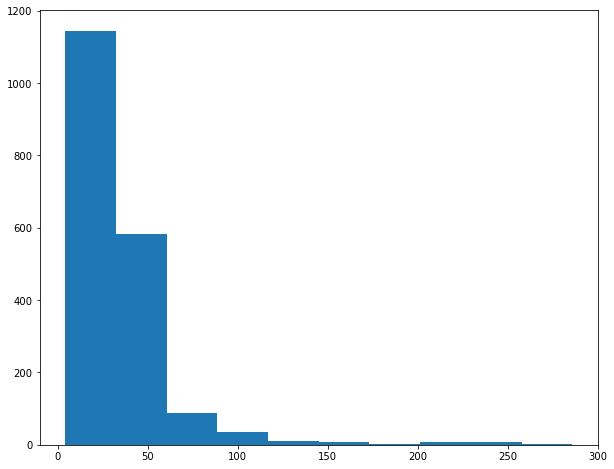

In [16]:
#mean paragraph length column analysis
mpl.figure(figsize=(10,8))
mpl.hist('mean_paragraph_len',data=df_train)
mpl.show()

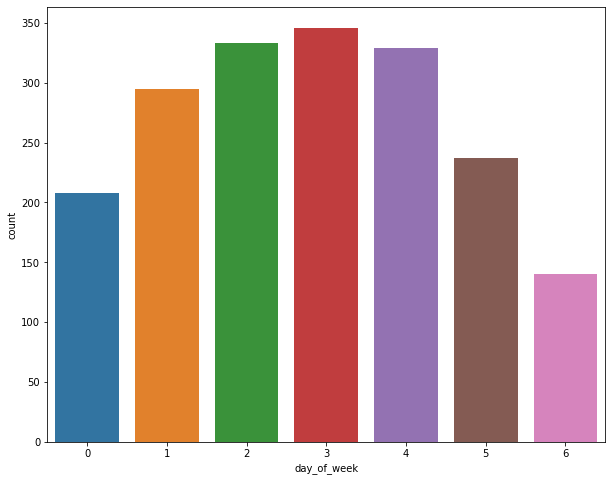

In [17]:
#day of week column analysis
mpl.figure(figsize=(10,8))
sns.countplot('day_of_week',data=df_train)
mpl.show()

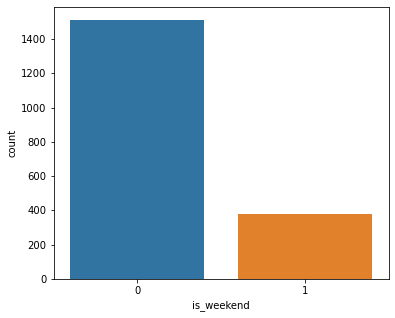

In [18]:
#is weekend column analysis
mpl.figure(figsize=(6,5))
sns.countplot('is_weekend',data=df_train)
mpl.show()

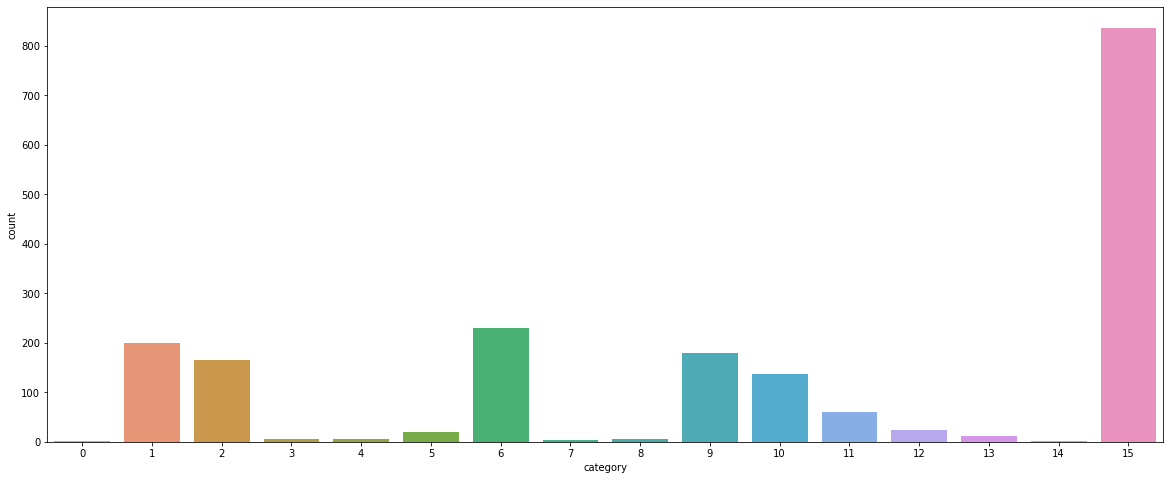

In [19]:
#category column analysis
mpl.figure(figsize=(20,8))
sns.countplot('category',data=df_train)
mpl.show()

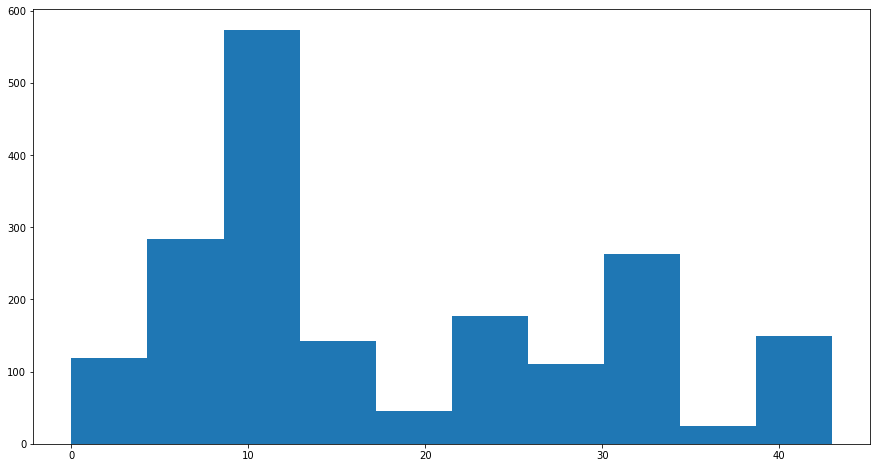

In [20]:
#product column analysis
mpl.figure(figsize=(15,8))
mpl.hist('product',data=df_train)
mpl.show()

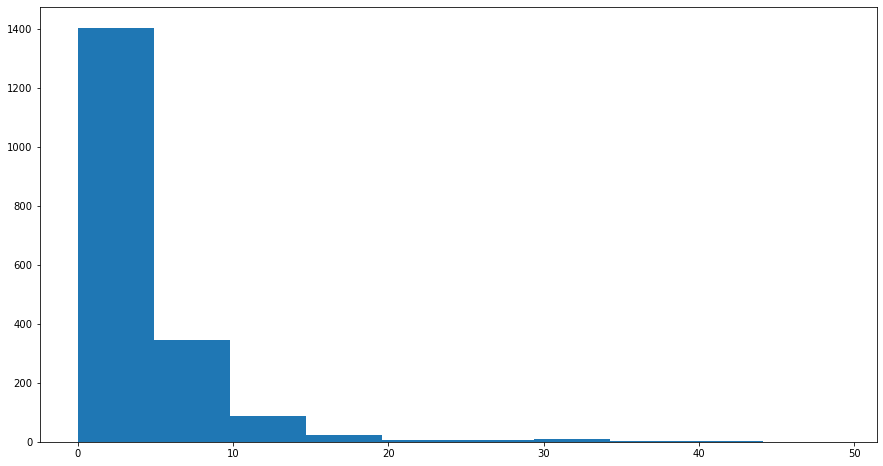

In [21]:
mpl.figure(figsize=(15,8))
mpl.hist('no_of_CTA',data=df_train)
mpl.show()

In [22]:
count=[ 'is_image','is_personalised'
       ,'is_quote',
 'is_timer',
 'is_emoticons',
 'is_discount',
 'is_price',
 'is_urgency',
 'target_audience']

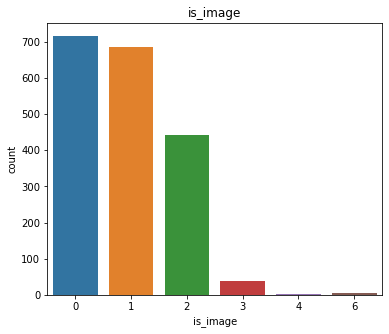

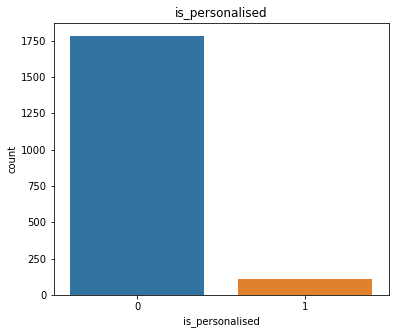

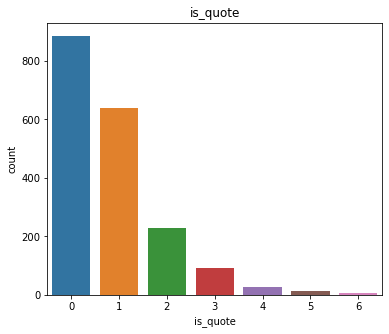

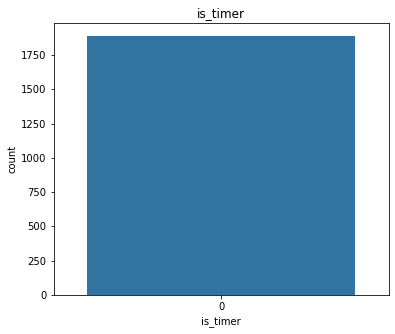

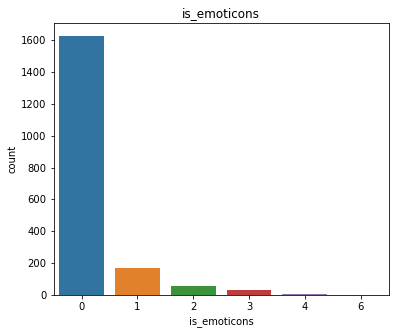

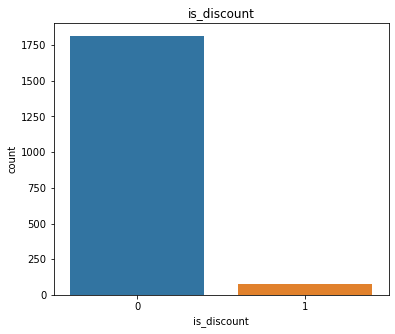

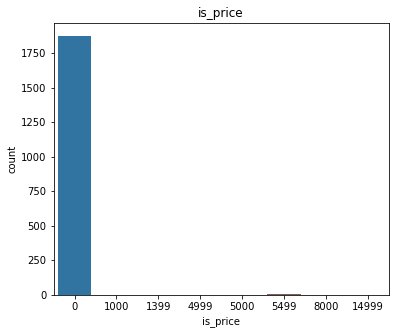

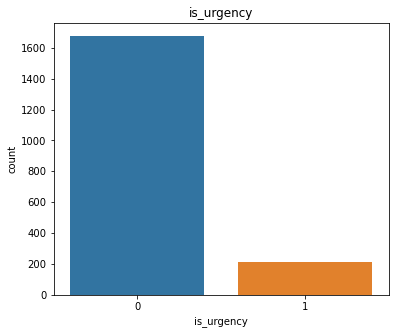

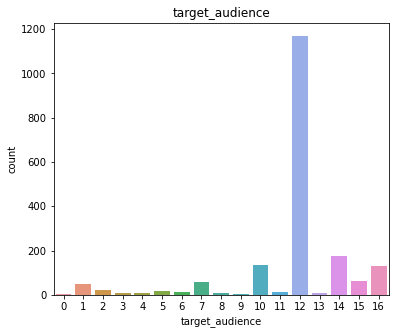

In [23]:
for i in count:
    mpl.figure(figsize=(6,5))
    sns.countplot(df_train[i],data=df_train)
    mpl.title(i)
    mpl.show()

# EDA for test dataset

In [24]:
df_test.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience'],
      dtype='object')

In [25]:
counttest=['sender', 'day_of_week', 'is_weekend', 'times_of_day','category', 'is_image','is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience']
countt=['subject_len','body_len','mean_paragraph_len','no_of_CTA','product','mean_CTA_len']

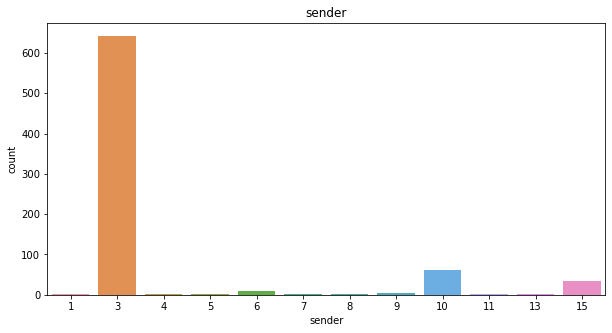

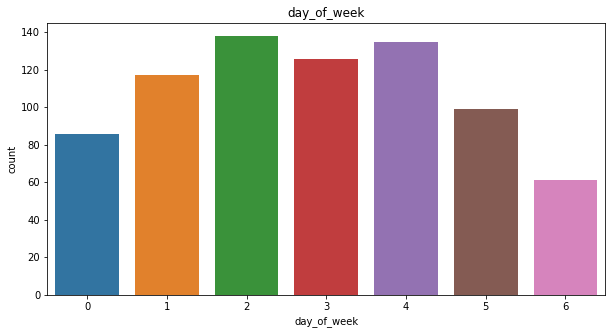

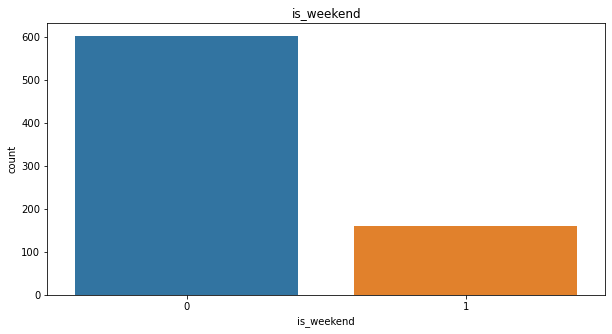

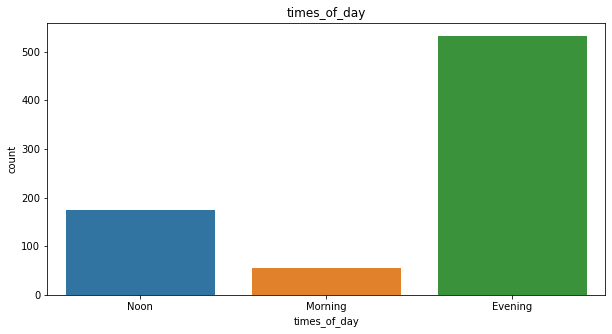

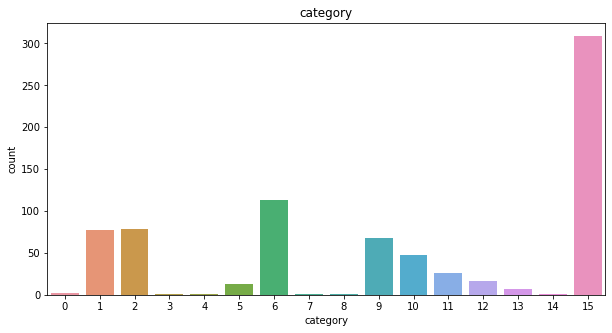

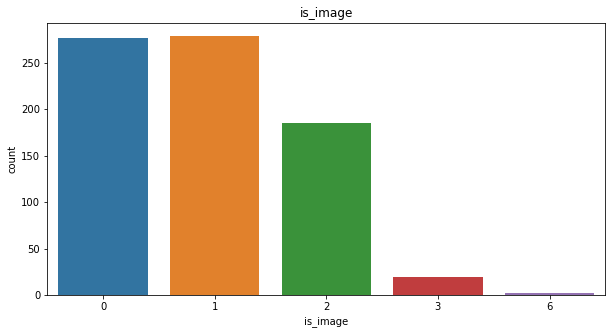

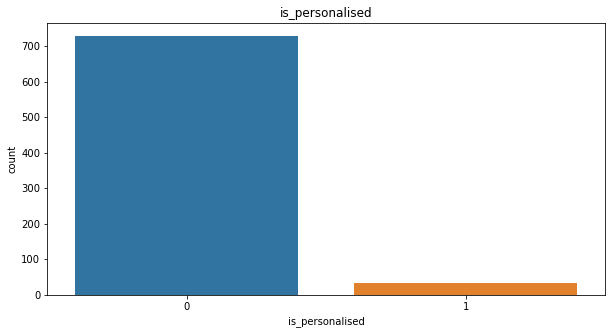

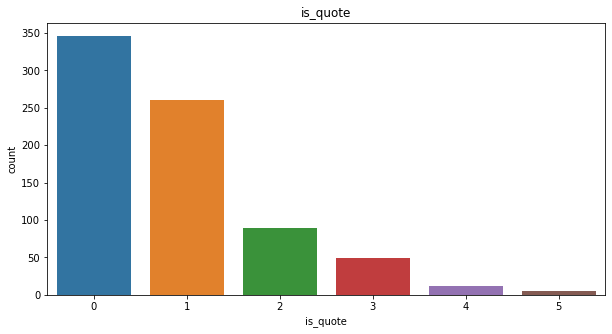

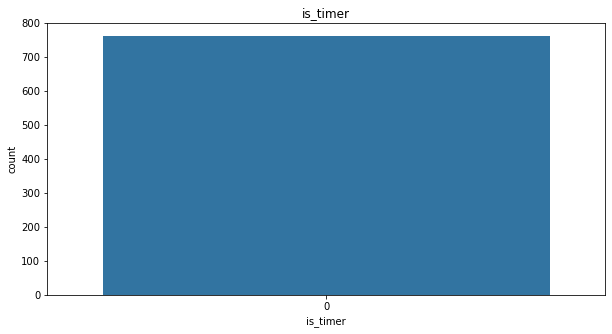

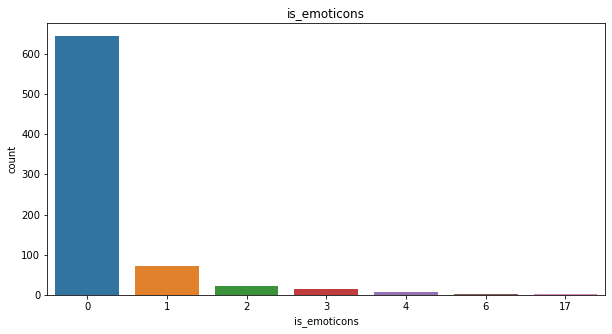

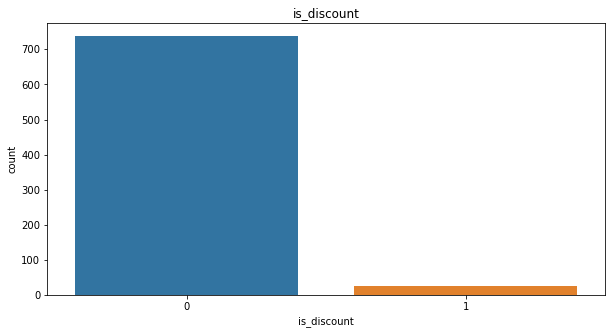

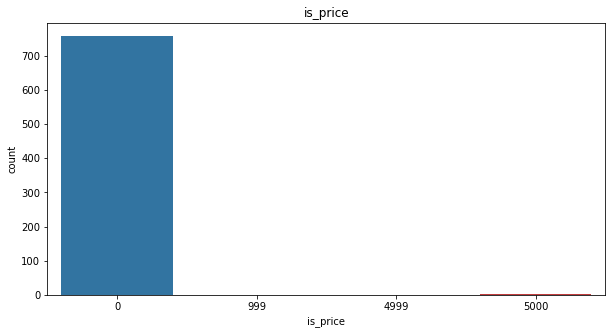

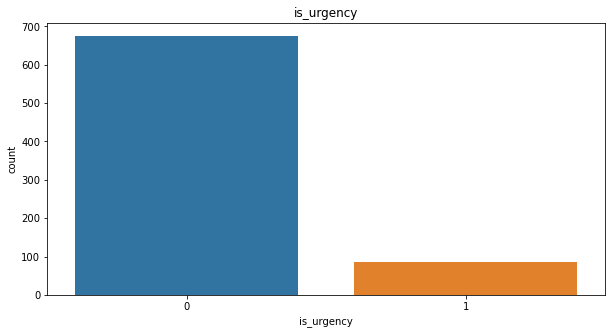

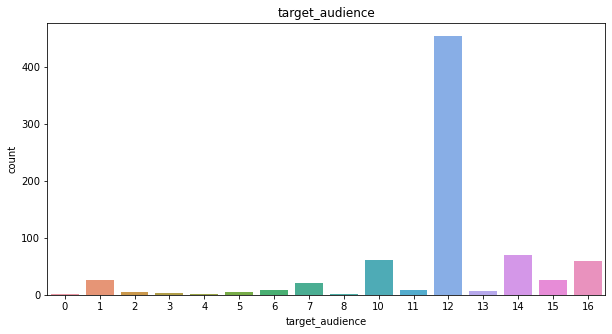

In [26]:
for i in counttest:
    mpl.figure(figsize=(10,5))
    sns.countplot(df_test[i],data=df_test)
    mpl.title(i)
    mpl.show()

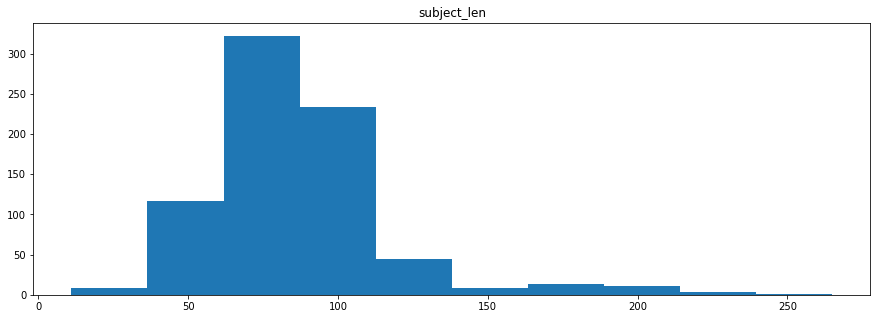

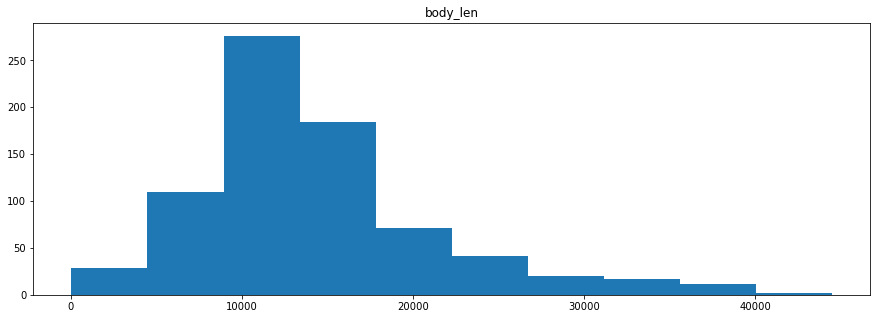

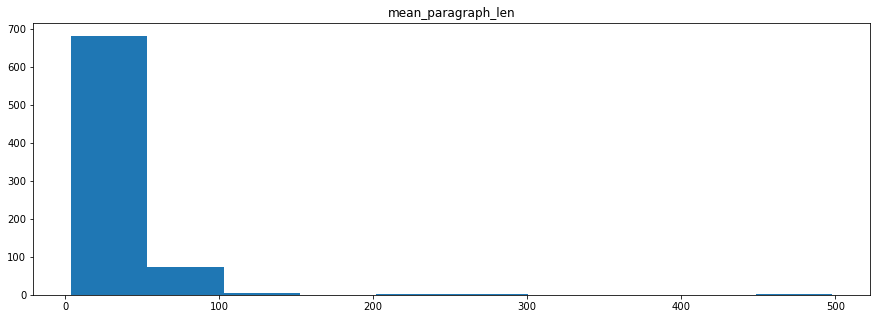

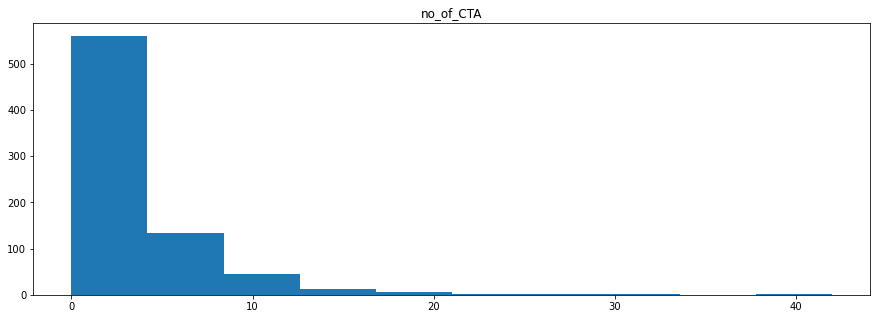

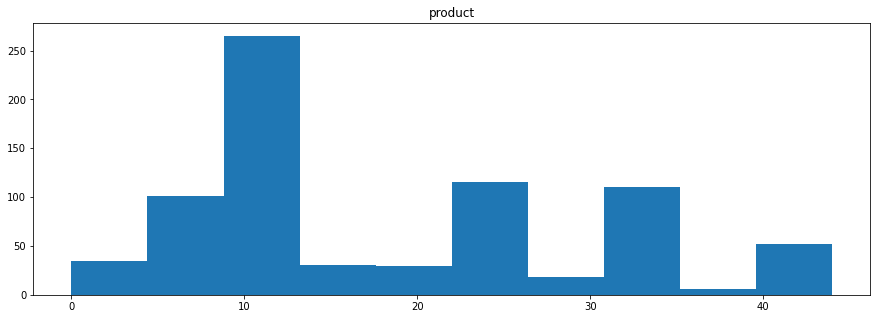

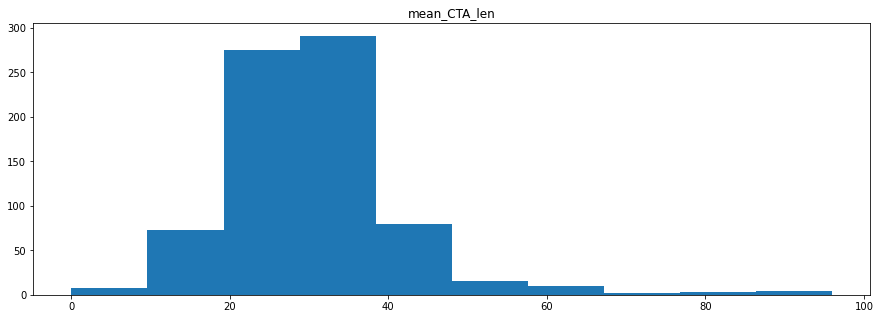

In [27]:
for i in countt:
    mpl.figure(figsize=(15,5))
    mpl.hist(i,data=df_test)
    mpl.title(i)
    mpl.show()

In [28]:
#is _timer  column contain only one value 0 value 
df_train.drop(['is_timer'],axis=1,inplace=True)
df_test.drop(['is_timer'],axis=1,inplace=True)

In [29]:
df_train.shape,df_test.shape

((1888, 21), (762, 20))

# handling of categorical values

In [30]:
cate

['times_of_day']

In [31]:
#using label encoder technique convert categorical value into numerical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['times_of_day']=le.fit_transform(df_train['times_of_day'])
df_test['times_of_day']=le.fit_transform(df_test['times_of_day'])

In [32]:
df_train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,29,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,...,22,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,23,1,0,1,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,24,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,31,0,0,1,0,0,0,0,14,0.142826


In [33]:
df_test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,2,6,26,3,37,1,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,0,2,11,0,22,1,0,1,0,0,0,0,10
3,1892,3,88,1473,78,3,0,0,2,11,0,22,1,0,1,0,0,0,0,10
4,1893,3,78,9020,29,3,0,2,6,26,2,40,0,0,0,0,0,0,0,14


# Finding of correlation

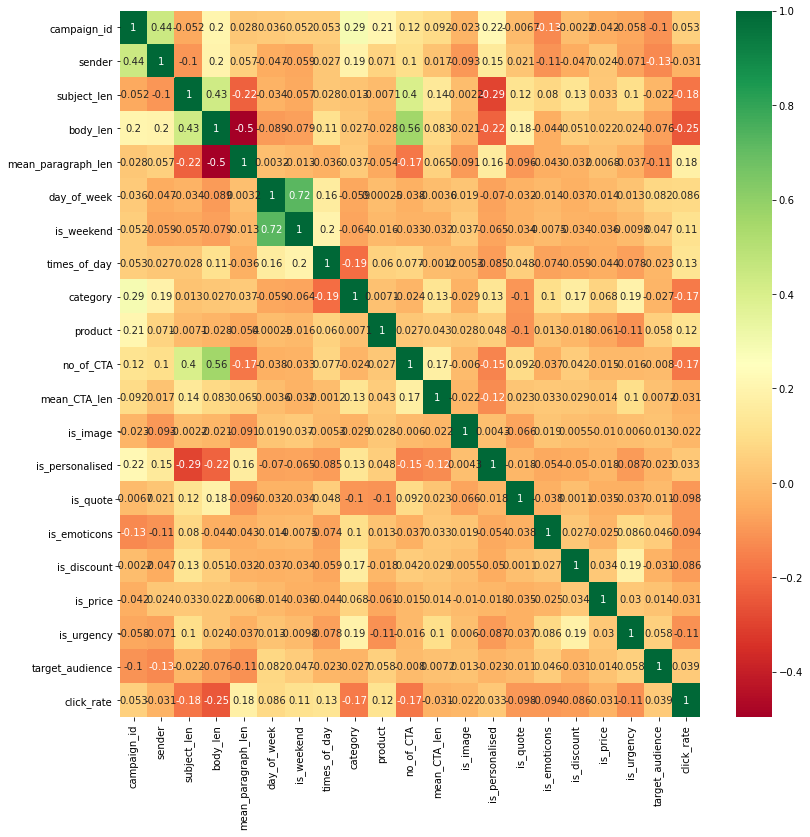

In [34]:
corelation=df_train.corr()
mpl.figure(figsize=(13,13))
g=sns.heatmap(df_train.corr(),annot=True,cmap="RdYlGn")

# Training and Testing of data

In [35]:
x_train=df_train.drop(['campaign_id','click_rate'],axis=1)
y_train=df_train[['click_rate']]

In [36]:
x_train.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,3,76,10439,39,5,1,2,6,26,3,29,0,0,0,0,0,0,0,14
1,3,54,2570,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,10
2,3,59,12801,16,5,1,2,2,11,3,23,1,0,1,0,0,0,0,16
3,3,74,11037,30,4,0,0,15,9,4,24,0,0,0,0,0,0,0,10
4,3,80,10011,27,5,1,2,6,26,3,31,0,0,1,0,0,0,0,14


In [37]:
y_train.head()

,click_rate
0,0.103079
1,0.700000
2,0.002769
3,0.010868
4,0.142826


In [38]:
df_test.drop(['campaign_id'],axis=1,inplace=True)

In [39]:
df_test.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,3,61,12871,11,6,1,2,6,26,3,37,1,0,0,1,0,0,0,14
1,3,54,2569,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,10
2,3,88,1473,78,4,0,0,2,11,0,22,1,0,1,0,0,0,0,10
3,3,88,1473,78,3,0,0,2,11,0,22,1,0,1,0,0,0,0,10
4,3,78,9020,29,3,0,2,6,26,2,40,0,0,0,0,0,0,0,14


In [40]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.20)

# Model building

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
import optuna
#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=100)
reg=ExtraTreesRegressor(n_estimators= 162,max_depth=487, max_leaf_nodes= 252, criterion= 'squared_error')
reg.fit(x_train,y_train)

ExtraTreesRegressor(max_depth=487, max_leaf_nodes=252, n_estimators=162)

In [49]:
pre=reg.predict(x_test)

In [50]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score:%.2f" % r2_score(y_test,pre))
print("mean squared error:%.2f"%mean_squared_error(y_test,pre))

R2 score:0.52
mean squared error:0.00


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pr=reg.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score:%.2f" % r2_score(y_test,pre))
print("mean squared error:%.2f"%mean_squared_error(y_test,pre))

R2 score:0.52
mean squared error:0.00


In [59]:
from sklearn.tree import DecisionTreeRegressor
regress=DecisionTreeRegressor()
regress.fit(x_train,y_train)
pir=regress.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score:%.2f" % r2_score(y_test,pir))
print("mean squared error:%.2f"%mean_squared_error(y_test,pir))

R2 score:0.03
mean squared error:0.01


In [ ]:
final=reg.predict(df_test)

In [ ]:
pred=pd.DataFrame(final)
sub_df=pd.read_csv('sample_submission_LJ2N3ZQ.csv')
datasets=pd.concat([sub_df['campaign_id'],pred],axis=1)
datasets.columns=['campaign_id','click_rate']
datasets.to_csv('f_sample_submisson.csv',index=False)

In [ ]:
import xgboost as xgb
xg=xgb.XGBRegressor()
xg.fit(x_train,y_train)

In [ ]:
p=xg.predict(x_test)
print("R2 score:%.2f" % r2_score(y_test,p))
print("mean squared error:%.2f"%mean_squared_error(y_test,p))

In [ ]:
import optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 5000)
    max_depth = trial.suggest_int('max_depth', 2,500)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2,500)
    criterion = trial.suggest_categorical('criterion', ['squared_error', 'absolute_error'])

    ### modeling with suggested params
    model = ExtraTreesRegressor(n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 max_leaf_nodes = max_leaf_nodes,
                                 criterion = criterion,
                                 random_state = 0) # do not tune the seed

    ### cross validation score
    # score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3)
    # etr_score = score.mean()

    ### fit
    model.fit(x_train, y_train) # train on train data
    accuracy = round(model.score(x_test, y_test), 5) # validate on validation data
    max=0
    if accuracy>max:
        max+=accuracy
        final=model.predict(df_test)
        pred=pd.DataFrame(final)
        sub_df=pd.read_csv('sample_submission_LJ2N3ZQ.csv')
        datasets=pd.concat([sub_df['campaign_id'],pred],axis=1)
        datasets.columns=['campaign_id','click_rate']
        datasets.to_csv('f_sample_submisson.csv',index=False)

    return accuracy
    
study = optuna.create_study(direction='maximize') # maximize accuracy
study.optimize(objective, n_trials=50)

[I 2022-08-07 18:25:18,313] A new study created in memory with name: no-name-63ab8ec2-effb-4530-a95d-91c38dd0dcad
[I 2022-08-07 18:25:53,789] Trial 0 finished with value: 0.56618 and parameters: {'n_estimators': 3587, 'max_depth': 20, 'max_leaf_nodes': 421, 'criterion': 'squared_error'}. Best is trial 0 with value: 0.56618.
[I 2022-08-07 18:26:08,771] Trial 1 finished with value: 0.56448 and parameters: {'n_estimators': 1519, 'max_depth': 137, 'max_leaf_nodes': 429, 'criterion': 'squared_error'}. Best is trial 0 with value: 0.56618.
[I 2022-08-07 18:26:33,406] Trial 2 finished with value: 0.47074 and parameters: {'n_estimators': 4719, 'max_depth': 249, 'max_leaf_nodes': 73, 'criterion': 'squared_error'}. Best is trial 0 with value: 0.56618.
[I 2022-08-07 18:26:37,791] Trial 3 finished with value: 0.30014 and parameters: {'n_estimators': 1058, 'max_depth': 244, 'max_leaf_nodes': 30, 'criterion': 'squared_error'}. Best is trial 0 with value: 0.56618.
[I 2022-08-07 18:26:53,721] Trial 4 f